In [3]:
import cv2
import numpy as np

In [4]:
haar_data = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [6]:
capture = cv2.VideoCapture(0)
face_data = []
while True:
    flag, img = capture.read()
    img = cv2.resize(img, None, fx=0.5,fy=0.5)
    faces = haar_data.detectMultiScale(img)
    for x,y,w,h in faces:
        cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0), 4)
        face = img[y:y+h, x:x+w,  :]
        face = cv2.resize(face, (50,50))
        if len(face_data) < 100:
            face_data.append(face)
    
    cv2.imshow('result', img)
    if cv2.waitKey(2) == 27 or len(face_data) >= 100:
        break

capture.release()
cv2.destroyAllWindows()

In [7]:
face_data = np.asarray(face_data)

In [8]:
face_data.shape

(100, 50, 50, 3)

In [9]:
face_data = face_data.reshape(100, -1)

In [10]:
face_data.shape

(100, 7500)

In [11]:
import matplotlib.pyplot as plt

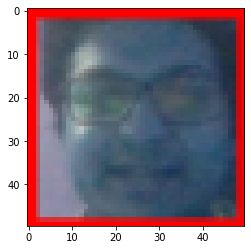

In [14]:
plt.imshow(face_data[28].reshape(50,50,3))

In [15]:
np.save('faces.npy', face_data)

In [16]:
face_data[0]

array([255,   0,   0, ..., 255,   0,   0], dtype=uint8)